In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import numpy as np
import sqlite3
import matplotlib.ticker as ticker

In [2]:
movies = pd.read_csv("data/tmdb.movies.csv")

movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [3]:
movies.loc[movies["id"] == 561861]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26506,26506,[],561861,en,Eden,0.6,2018-11-25,Eden,0.0,1


In [4]:
budgets = pd.read_csv("data/tn.movie_budgets.csv")
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
reviews = pd.read_csv("data/rt.reviews.tsv", sep="\t", header=0, encoding="ISO-8859-1")
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [6]:
info = pd.read_csv("data/rt.movie_info.tsv", delimiter = "\t")
info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [7]:
gross = pd.read_csv("data/bom.movie_gross.csv")
gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [8]:
gross.loc[gross["title"] == "Avatar"]

,title,studio,domestic_gross,foreign_gross,year


In [9]:
conn = sqlite3.connect("data/im.db")

df = pd.read_sql_query("""

SELECT * 
FROM "sqlite_master"

""", conn)

df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [10]:
movie_basics = pd.read_sql_query("""

SELECT * 
FROM "movie_basics"

""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [11]:
directors = pd.read_sql_query("""

SELECT * 
FROM "directors"

""", conn)
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [12]:
known_for = pd.read_sql_query("""

SELECT * 
FROM "known_for"

""", conn)
known_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [13]:
movie_akas = pd.read_sql_query("""

SELECT * 
FROM "movie_akas"

""", conn)
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [14]:
movie_ratings = pd.read_sql_query("""

SELECT * 
FROM "movie_ratings"

""", conn)
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [15]:
persons = pd.read_sql_query("""

SELECT * 
FROM "persons"

""", conn)
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [16]:
principals = pd.read_sql_query("""

SELECT * 
FROM "principals"

""", conn)
principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [17]:
writers = pd.read_sql_query("""

SELECT * 
FROM "writers"

""", conn)
writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [18]:
### Use movies, budgets, and gross - merge across title, movie, title.

In [19]:
money_df = budgets.merge(gross, left_on="movie",right_on="title", how="inner")



In [20]:
mov_mon_df = movies.merge(money_df, left_on="title",right_on="movie", how="inner")
mov_mon_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1395 non-null   int64  
 1   genre_ids          1395 non-null   object 
 2   id_x               1395 non-null   int64  
 3   original_language  1395 non-null   object 
 4   original_title     1395 non-null   object 
 5   popularity         1395 non-null   float64
 6   release_date_x     1395 non-null   object 
 7   title_x            1395 non-null   object 
 8   vote_average       1395 non-null   float64
 9   vote_count         1395 non-null   int64  
 10  id_y               1395 non-null   int64  
 11  release_date_y     1395 non-null   object 
 12  movie              1395 non-null   object 
 13  production_budget  1395 non-null   object 
 14  domestic_gross_x   1395 non-null   object 
 15  worldwide_gross    1395 non-null   object 
 16  title_y            1395 

In [21]:
money_df.loc[money_df["movie"] == "Avatar"]

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year


In [22]:
mov_mon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1395 non-null   int64  
 1   genre_ids          1395 non-null   object 
 2   id_x               1395 non-null   int64  
 3   original_language  1395 non-null   object 
 4   original_title     1395 non-null   object 
 5   popularity         1395 non-null   float64
 6   release_date_x     1395 non-null   object 
 7   title_x            1395 non-null   object 
 8   vote_average       1395 non-null   float64
 9   vote_count         1395 non-null   int64  
 10  id_y               1395 non-null   int64  
 11  release_date_y     1395 non-null   object 
 12  movie              1395 non-null   object 
 13  production_budget  1395 non-null   object 
 14  domestic_gross_x   1395 non-null   object 
 15  worldwide_gross    1395 non-null   object 
 16  title_y            1395 

In [23]:
mov_mon_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title_x,vote_average,vote_count,...,release_date_y,movie,production_budget,domestic_gross_x,worldwide_gross,title_y,studio,domestic_gross_y,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992",How to Train Your Dragon,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389",Iron Man 2,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",Inception,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522",Toy Story 3,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,"Jul 9, 2010",Despicable Me,"$69,000,000","$251,513,985","$543,464,573",Despicable Me,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,24089,"[18, 36, 53]",453201,en,The 15:17 to Paris,11.576,2018-02-09,The 15:17 to Paris,5.3,799,...,"Feb 9, 2018",The 15:17 to Paris,"$30,000,000","$36,276,286","$56,096,200",The 15:17 to Paris,WB,36300000.0,20800000,2018
1391,24120,[35],474335,en,Uncle Drew,10.836,2018-06-29,Uncle Drew,6.5,220,...,"Jun 29, 2018",Uncle Drew,"$18,000,000","$42,469,946","$46,527,161",Uncle Drew,LG/S,42500000.0,4200000,2018
1392,24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,...,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100",Gotti,VE,4300000.0,NaN,2018
1393,24212,"[53, 28, 80]",442064,en,Proud Mary,9.371,2018-01-12,Proud Mary,5.5,259,...,"Jan 12, 2018",Proud Mary,"$30,000,000","$20,868,638","$21,709,539",Proud Mary,SGem,20900000.0,876000,2018


In [24]:
##high corr with vote count and popularity

In [25]:
mov_mon_df["foreign_gross"] = pd.to_numeric(mov_mon_df["foreign_gross"], errors='coerce')

In [26]:
mov_mon_df["worldwide_gross_int"] = mov_mon_df["domestic_gross_y"] + mov_mon_df["foreign_gross"]
mov_mon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1395 non-null   int64  
 1   genre_ids            1395 non-null   object 
 2   id_x                 1395 non-null   int64  
 3   original_language    1395 non-null   object 
 4   original_title       1395 non-null   object 
 5   popularity           1395 non-null   float64
 6   release_date_x       1395 non-null   object 
 7   title_x              1395 non-null   object 
 8   vote_average         1395 non-null   float64
 9   vote_count           1395 non-null   int64  
 10  id_y                 1395 non-null   int64  
 11  release_date_y       1395 non-null   object 
 12  movie                1395 non-null   object 
 13  production_budget    1395 non-null   object 
 14  domestic_gross_x     1395 non-null   object 
 15  worldwide_gross      1395 non-null   o

In [27]:
mov_mon_df.corr()

,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int
Unnamed: 0,1.000000,0.895255,0.282763,0.127839,0.098331,0.044963,0.081371,0.110522,0.900997,0.108095
id_x,0.895255,1.000000,0.127053,0.127127,-0.034340,0.064892,-0.030499,-0.026535,0.828126,-0.019415
popularity,0.282763,0.127053,1.000000,0.294803,0.688383,-0.046922,0.529804,0.542425,0.274996,0.540693
vote_average,0.127839,0.127127,0.294803,1.000000,0.390737,-0.018709,0.207028,0.195481,0.104429,0.209666
vote_count,0.098331,-0.034340,0.688383,0.390737,1.000000,-0.037496,0.714330,0.688143,0.098169,0.713494
id_y,0.044963,0.064892,-0.046922,-0.018709,-0.037496,1.000000,-0.042324,-0.065661,0.063910,-0.056628
domestic_gross_y,0.081371,-0.030499,0.529804,0.207028,0.714330,-0.042324,1.000000,0.847828,0.114860,0.936174
foreign_gross,0.110522,-0.026535,0.542425,0.195481,0.688143,-0.065661,0.847828,1.000000,0.130784,0.980125
year,0.900997,0.828126,0.274996,0.104429,0.098169,0.063910,0.114860,0.130784,1.000000,0.134925
worldwide_gross_int,0.108095,-0.019415,0.540693,0.209666,0.713494,-0.056628,0.936174,0.980125,0.134925,1.000000


In [28]:
mov_mon_df["production_budget_clean"] = mov_mon_df["production_budget"].replace({"\$":"",",":""},regex=True)

mov_mon_df["production_budget_clean"] = pd.to_numeric(mov_mon_df["production_budget_clean"], errors='coerce')

mov_mon_df



,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title_x,vote_average,vote_count,...,production_budget,domestic_gross_x,worldwide_gross,title_y,studio,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"$165,000,000","$217,581,232","$494,870,992",How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08,165000000
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,"$170,000,000","$312,433,331","$621,156,389",Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,170000000
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,"$160,000,000","$292,576,195","$835,524,642",Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,160000000
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,"$200,000,000","$415,004,880","$1,068,879,522",Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,200000000
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,"$69,000,000","$251,513,985","$543,464,573",Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08,69000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,24089,"[18, 36, 53]",453201,en,The 15:17 to Paris,11.576,2018-02-09,The 15:17 to Paris,5.3,799,...,"$30,000,000","$36,276,286","$56,096,200",The 15:17 to Paris,WB,36300000.0,20800000.0,2018,5.710000e+07,30000000
1391,24120,[35],474335,en,Uncle Drew,10.836,2018-06-29,Uncle Drew,6.5,220,...,"$18,000,000","$42,469,946","$46,527,161",Uncle Drew,LG/S,42500000.0,4200000.0,2018,4.670000e+07,18000000
1392,24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,...,"$10,000,000","$4,286,367","$6,089,100",Gotti,VE,4300000.0,NaN,2018,NaN,10000000
1393,24212,"[53, 28, 80]",442064,en,Proud Mary,9.371,2018-01-12,Proud Mary,5.5,259,...,"$30,000,000","$20,868,638","$21,709,539",Proud Mary,SGem,20900000.0,876000.0,2018,2.177600e+07,30000000


In [29]:
mov_mon_df.corr()

,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean
Unnamed: 0,1.000000,0.895255,0.282763,0.127839,0.098331,0.044963,0.081371,0.110522,0.900997,0.108095,0.052320
id_x,0.895255,1.000000,0.127053,0.127127,-0.034340,0.064892,-0.030499,-0.026535,0.828126,-0.019415,-0.126072
popularity,0.282763,0.127053,1.000000,0.294803,0.688383,-0.046922,0.529804,0.542425,0.274996,0.540693,0.552256
vote_average,0.127839,0.127127,0.294803,1.000000,0.390737,-0.018709,0.207028,0.195481,0.104429,0.209666,0.080230
vote_count,0.098331,-0.034340,0.688383,0.390737,1.000000,-0.037496,0.714330,0.688143,0.098169,0.713494,0.587160
id_y,0.044963,0.064892,-0.046922,-0.018709,-0.037496,1.000000,-0.042324,-0.065661,0.063910,-0.056628,-0.091404
domestic_gross_y,0.081371,-0.030499,0.529804,0.207028,0.714330,-0.042324,1.000000,0.847828,0.114860,0.936174,0.692350
foreign_gross,0.110522,-0.026535,0.542425,0.195481,0.688143,-0.065661,0.847828,1.000000,0.130784,0.980125,0.775390
year,0.900997,0.828126,0.274996,0.104429,0.098169,0.063910,0.114860,0.130784,1.000000,0.134925,0.047264
worldwide_gross_int,0.108095,-0.019415,0.540693,0.209666,0.713494,-0.056628,0.936174,0.980125,0.134925,1.000000,0.761720


In [30]:
temp = mov_mon_df.merge(movie_basics, left_on="movie",right_on="primary_title", how="inner")
temp



,Unnamed: 0,genre_ids,id_x,original_language,original_title_x,popularity,release_date_x,title_x,vote_average,vote_count,...,foreign_gross,year,worldwide_gross_int,production_budget_clean,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,277300000.0,2010,4.949000e+08,165000000,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,311500000.0,2010,6.239000e+08,170000000,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,535700000.0,2010,8.283000e+08,160000000,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,652000000.0,2010,1.067000e+09,200000000,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,291600000.0,2010,5.431000e+08,69000000,tt1323594,Despicable Me,Despicable Me,2010,95.0,"Animation,Comedy,Family"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,24089,"[18, 36, 53]",453201,en,The 15:17 to Paris,11.576,2018-02-09,The 15:17 to Paris,5.3,799,...,20800000.0,2018,5.710000e+07,30000000,tt6802308,The 15:17 to Paris,The 15:17 to Paris,2018,94.0,"Biography,Drama,Thriller"
2093,24120,[35],474335,en,Uncle Drew,10.836,2018-06-29,Uncle Drew,6.5,220,...,4200000.0,2018,4.670000e+07,18000000,tt7334528,Uncle Drew,Uncle Drew,2018,103.0,"Comedy,Sport"
2094,24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,...,NaN,2018,NaN,10000000,tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama"
2095,24212,"[53, 28, 80]",442064,en,Proud Mary,9.371,2018-01-12,Proud Mary,5.5,259,...,876000.0,2018,2.177600e+07,30000000,tt6421110,Proud Mary,Proud Mary,2018,89.0,"Action,Crime,Drama"


In [31]:
mov_genres_money_df = temp.merge(movie_basics, left_on="movie",right_on="original_title", how="inner")
mov_genres_money_df


,Unnamed: 0,genre_ids,id_x,original_language,original_title_x,popularity,release_date_x,title_x,vote_average,vote_count,...,original_title_y,start_year_x,runtime_minutes_x,genres_x,movie_id_y,primary_title_y,original_title,start_year_y,runtime_minutes_y,genres_y
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,Despicable Me,2010,95.0,"Animation,Comedy,Family",tt1323594,Despicable Me,Despicable Me,2010,95.0,"Animation,Comedy,Family"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229,24089,"[18, 36, 53]",453201,en,The 15:17 to Paris,11.576,2018-02-09,The 15:17 to Paris,5.3,799,...,The 15:17 to Paris,2018,94.0,"Biography,Drama,Thriller",tt6802308,The 15:17 to Paris,The 15:17 to Paris,2018,94.0,"Biography,Drama,Thriller"
5230,24120,[35],474335,en,Uncle Drew,10.836,2018-06-29,Uncle Drew,6.5,220,...,Uncle Drew,2018,103.0,"Comedy,Sport",tt7334528,Uncle Drew,Uncle Drew,2018,103.0,"Comedy,Sport"
5231,24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,...,Gotti,2018,112.0,"Biography,Crime,Drama",tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama"
5232,24212,"[53, 28, 80]",442064,en,Proud Mary,9.371,2018-01-12,Proud Mary,5.5,259,...,Proud Mary,2018,89.0,"Action,Crime,Drama",tt6421110,Proud Mary,Proud Mary,2018,89.0,"Action,Crime,Drama"


In [32]:


mov_genres_money_df.loc[mov_genres_money_df["movie"] == "Avatar"]

,Unnamed: 0,genre_ids,id_x,original_language,original_title_x,popularity,release_date_x,title_x,vote_average,vote_count,...,original_title_y,start_year_x,runtime_minutes_x,genres_x,movie_id_y,primary_title_y,original_title,start_year_y,runtime_minutes_y,genres_y


In [33]:
mov_clean = mov_genres_money_df.drop_duplicates(subset="original_title")
mov_clean

,Unnamed: 0,genre_ids,id_x,original_language,original_title_x,popularity,release_date_x,title_x,vote_average,vote_count,...,original_title_y,start_year_x,runtime_minutes_x,genres_x,movie_id_y,primary_title_y,original_title,start_year_y,runtime_minutes_y,genres_y
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,Despicable Me,2010,95.0,"Animation,Comedy,Family",tt1323594,Despicable Me,Despicable Me,2010,95.0,"Animation,Comedy,Family"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229,24089,"[18, 36, 53]",453201,en,The 15:17 to Paris,11.576,2018-02-09,The 15:17 to Paris,5.3,799,...,The 15:17 to Paris,2018,94.0,"Biography,Drama,Thriller",tt6802308,The 15:17 to Paris,The 15:17 to Paris,2018,94.0,"Biography,Drama,Thriller"
5230,24120,[35],474335,en,Uncle Drew,10.836,2018-06-29,Uncle Drew,6.5,220,...,Uncle Drew,2018,103.0,"Comedy,Sport",tt7334528,Uncle Drew,Uncle Drew,2018,103.0,"Comedy,Sport"
5231,24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,...,Gotti,2018,112.0,"Biography,Crime,Drama",tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama"
5232,24212,"[53, 28, 80]",442064,en,Proud Mary,9.371,2018-01-12,Proud Mary,5.5,259,...,Proud Mary,2018,89.0,"Action,Crime,Drama",tt6421110,Proud Mary,Proud Mary,2018,89.0,"Action,Crime,Drama"


In [34]:
mov_clean.loc[mov_clean["movie"] == "Gotti"]

,Unnamed: 0,genre_ids,id_x,original_language,original_title_x,popularity,release_date_x,title_x,vote_average,vote_count,...,original_title_y,start_year_x,runtime_minutes_x,genres_x,movie_id_y,primary_title_y,original_title,start_year_y,runtime_minutes_y,genres_y
5231,24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,...,Gotti,2018,112.0,"Biography,Crime,Drama",tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama"


In [35]:
mov_clean.corr()

,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y,runtime_minutes_y
Unnamed: 0,1.000000,0.905933,0.324263,0.098387,0.087073,0.034747,0.072586,0.112036,0.955273,0.102123,0.052739,0.893583,0.101675,0.892158,0.106817
id_x,0.905933,1.000000,0.174812,0.104519,-0.040832,0.056729,-0.036522,-0.025278,0.887845,-0.025701,-0.122767,0.815211,0.035057,0.817604,0.041876
popularity,0.324263,0.174812,1.000000,0.315297,0.683044,-0.057543,0.527059,0.538558,0.273307,0.535446,0.552976,0.302555,0.320307,0.296855,0.313209
vote_average,0.098387,0.104519,0.315297,1.000000,0.407612,-0.023262,0.213670,0.200806,0.076802,0.213651,0.082674,0.079586,0.358488,0.085881,0.357573
vote_count,0.087073,-0.040832,0.683044,0.407612,1.000000,-0.037762,0.699973,0.672610,0.063000,0.696669,0.586798,0.099799,0.386533,0.093794,0.378407
id_y,0.034747,0.056729,-0.057543,-0.023262,-0.037762,1.000000,-0.042985,-0.065455,0.039029,-0.058945,-0.085071,0.041695,-0.009247,0.045163,-0.018388
domestic_gross_y,0.072586,-0.036522,0.527059,0.213670,0.699973,-0.042985,1.000000,0.846342,0.096861,0.933088,0.694282,0.116515,0.284556,0.109698,0.278325
foreign_gross,0.112036,-0.025278,0.538558,0.200806,0.672610,-0.065455,0.846342,1.000000,0.122761,0.981274,0.770693,0.135633,0.290248,0.130933,0.287379
year,0.955273,0.887845,0.273307,0.076802,0.063000,0.039029,0.096861,0.122761,1.000000,0.120391,0.049367,0.893421,0.074676,0.894947,0.083779
worldwide_gross_int,0.102123,-0.025701,0.535446,0.213651,0.696669,-0.058945,0.933088,0.981274,0.120391,1.000000,0.760625,0.133678,0.294110,0.128124,0.291262


In [36]:
grouped = mov_clean.groupby("genres_y").sum()

grouped

,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y,runtime_minutes_y
genres_y,,,,,,,,,,,,,,,
Action,49080,662790,46.120,24.9,4394,210,1.456000e+08,1.845000e+08,8057,3.301000e+08,206700000,8060,188.0,8060,188.0
"Action,Adventure",11177,270938,10.059,5.8,126,54,1.180000e+04,0.000000e+00,2014,0.000000e+00,4500000,2014,103.0,2014,103.0
"Action,Adventure,Animation",126921,1974097,242.248,92.5,51850,625,2.156091e+09,4.082900e+09,26174,6.238991e+09,1690000000,26171,1300.0,26171,1300.0
"Action,Adventure,Biography",28446,487732,33.740,14.0,13201,28,2.086000e+08,4.182000e+08,4030,6.268000e+08,235000000,4030,278.0,4030,278.0
"Action,Adventure,Comedy",234595,3493874,416.397,102.1,114583,635,2.686100e+09,4.651500e+09,30232,7.337600e+09,1670000000,30230,1738.0,30230,1738.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Horror,Thriller",137619,2148836,152.676,80.9,23042,719,6.233069e+08,5.308800e+08,30206,1.140273e+09,169250000,30201,1450.0,30199,1367.0
"Mystery,Sci-Fi,Thriller",5002,89562,33.843,13.8,10229,184,2.062000e+08,2.157000e+08,4022,4.219000e+08,77000000,4022,217.0,4022,217.0
"Mystery,Thriller",19,11324,18.060,8.1,12625,52,1.280000e+08,1.668000e+08,2010,2.948000e+08,80000000,2010,138.0,2010,138.0


In [37]:
grouped.loc[grouped["worldwide_gross_int"] == grouped["worldwide_gross_int"].max()]

,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y,runtime_minutes_y
genres_y,,,,,,,,,,,,,,,
"Action,Adventure,Sci-Fi",460114,5517479,1013.059,268.4,318238,1951,9.825200e+09,1.479340e+10,82582,2.328750e+10,6941600000,82578,5367.0,82578,5367.0


In [38]:
grouped.sort_values(by="worldwide_gross_int",ascending=False).head(5)

,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y,runtime_minutes_y
genres_y,,,,,,,,,,,,,,,
"Action,Adventure,Sci-Fi",460114,5517479,1013.059,268.4,318238,1951,9.825200e+09,1.479340e+10,82582,2.328750e+10,6941600000,82578,5367.0,82578,5367.0
"Adventure,Animation,Comedy",682524,10273253,860.162,356.7,144127,2539,8.194900e+09,1.500050e+10,114809,2.316890e+10,5890500000,114808,5361.0,114808,5361.0
"Action,Adventure,Fantasy",408675,5514396,648.973,169.3,140475,1470,3.667600e+09,7.863200e+09,56425,1.153080e+10,4195600000,56422,3273.0,56422,3273.0
"Action,Adventure,Comedy",234595,3493874,416.397,102.1,114583,635,2.686100e+09,4.651500e+09,30232,7.337600e+09,1670000000,30230,1738.0,30230,1738.0
"Action,Adventure,Animation",126921,1974097,242.248,92.5,51850,625,2.156091e+09,4.082900e+09,26174,6.238991e+09,1690000000,26171,1300.0,26171,1300.0


In [39]:
### action adventure has the highest gross revenue worldwide

In [40]:
run = mov_clean.groupby("runtime_minutes_y").sum().sort_values(by="worldwide_gross_int",ascending=False)
run

,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y
runtime_minutes_y,,,,,,,,,,,,,,
93.0,194020,3458705,237.575,146.5,27034,1412,1.901251e+09,3.345419e+09,48317,5.240832e+09,1346200000,48311,2232.0,48311
103.0,317763,6000274,447.359,209.0,63435,1939,1.782462e+09,2.851580e+09,66440,4.619080e+09,1468400000,66436,3399.0,66436
98.0,250263,4634835,360.711,177.7,56467,1379,1.798834e+09,2.739300e+09,58384,4.518009e+09,1280550000,58375,2842.0,58375
108.0,259188,4655951,339.077,152.2,74596,1154,1.697946e+09,2.536065e+09,46319,4.229611e+09,763500000,46316,2484.0,46316
97.0,226456,4059687,288.576,161.9,49625,1171,1.695385e+09,2.474497e+09,50330,4.155094e+09,1122550000,50326,2425.0,50326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55.0,2396,128184,0.600,3.0,3,46,1.750000e+04,4.800000e+06,2015,4.817500e+06,12000000,2019,55.0,2019
78.0,19579,443275,14.939,12.3,157,48,1.801200e+06,2.700000e+06,4032,4.500000e+06,12000000,4020,156.0,4020
163.0,32188,689377,15.900,14.6,649,101,8.862999e+06,1.200000e+06,4031,1.863000e+06,16500000,4031,326.0,4031


In [41]:
run = run.reset_index()
run

,runtime_minutes_y,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y
0,93.0,194020,3458705,237.575,146.5,27034,1412,1.901251e+09,3.345419e+09,48317,5.240832e+09,1346200000,48311,2232.0,48311
1,103.0,317763,6000274,447.359,209.0,63435,1939,1.782462e+09,2.851580e+09,66440,4.619080e+09,1468400000,66436,3399.0,66436
2,98.0,250263,4634835,360.711,177.7,56467,1379,1.798834e+09,2.739300e+09,58384,4.518009e+09,1280550000,58375,2842.0,58375
3,108.0,259188,4655951,339.077,152.2,74596,1154,1.697946e+09,2.536065e+09,46319,4.229611e+09,763500000,46316,2484.0,46316
4,97.0,226456,4059687,288.576,161.9,49625,1171,1.695385e+09,2.474497e+09,50330,4.155094e+09,1122550000,50326,2425.0,50326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,55.0,2396,128184,0.600,3.0,3,46,1.750000e+04,4.800000e+06,2015,4.817500e+06,12000000,2019,55.0,2019
97,78.0,19579,443275,14.939,12.3,157,48,1.801200e+06,2.700000e+06,4032,4.500000e+06,12000000,4020,156.0,4020
98,163.0,32188,689377,15.900,14.6,649,101,8.862999e+06,1.200000e+06,4031,1.863000e+06,16500000,4031,326.0,4031
99,72.0,16567,340042,0.600,10.0,1,43,6.860000e+07,0.000000e+00,2018,0.000000e+00,10000000,2015,72.0,2015


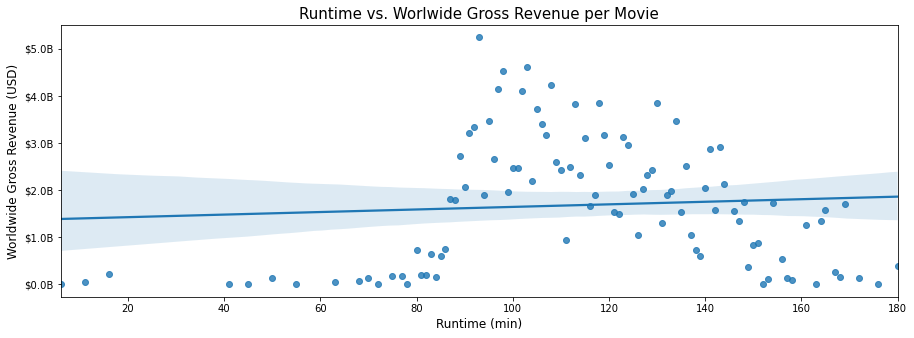

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x=run["runtime_minutes_y"], y=run["worldwide_gross_int"],ax=ax)
ax.set_xlabel("Runtime (min)", size = 12 )
ax.set_ylabel("Worldwide Gross Revenue (USD)", size = 12)
ax.set_title("Runtime vs. Worlwide Gross Revenue per Movie", size = 15)
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fB' % (x * 1e-9))
ax.yaxis.set_major_formatter(formatter);

In [43]:
run_gen = mov_clean.groupby(["runtime_minutes_y","genres_y"]).sum().sort_values(by="worldwide_gross_int",ascending=False)
run_gen.reset_index(inplace=True)
run_gen

,runtime_minutes_y,genres_y,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y
0,93.0,"Adventure,Animation,Comedy",21732,222323,52.021,24.3,10359,274,815500000.0,1.556700e+09,8049,2.372200e+09,682500000,8049,372.0,8049
1,97.0,"Adventure,Animation,Comedy",64929,874280,62.634,26.9,14524,208,875300000.0,1.357400e+09,8062,2.232700e+09,475000000,8062,388.0,8062
2,119.0,"Action,Adventure,Comedy",44484,736984,59.289,14.2,15986,53,723000000.0,1.018100e+09,4035,1.741100e+09,200000000,4035,238.0,4035
3,154.0,"Action,Adventure,Sci-Fi",23608,374344,29.597,12.1,8216,97,482599999.0,1.246700e+09,4028,1.729300e+09,412000000,4028,308.0,4028
4,92.0,"Adventure,Animation,Comedy",73325,1054296,92.106,37.9,8885,330,653500000.0,1.009300e+09,12086,1.662800e+09,626000000,12086,552.0,12086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,109.0,"Crime,Drama,Thriller",7949,98357,13.646,5.9,814,11,19700000.0,0.000000e+00,2013,0.000000e+00,35000000,2013,109.0,2013
916,91.0,"Drama,Fantasy,Romance",3088,54662,3.836,5.8,38,62,569000.0,0.000000e+00,2011,0.000000e+00,1000000,2011,91.0,2011
917,101.0,"Drama,Horror,Mystery",2703,58428,8.494,5.5,324,78,78400.0,0.000000e+00,2012,0.000000e+00,750000,2011,101.0,2011
918,106.0,"Drama,History,War",14698,256962,5.805,7.0,292,65,6500000.0,0.000000e+00,2015,0.000000e+00,20000000,2015,106.0,2015


In [44]:
genres_clean = []
for i in run_gen["genres_y"]:
    temp = []
    first = i.split(",")
    temp.append(first[0])
    genres_clean.append(temp[0])


run_gen["Genres"] = genres_clean

run_gen
# run_gen = run_gen.assign(genres = run_gen['genres_y'].str.split(','))
# run_gen = run_gen.explode('genres_y')
# runtime_by_genre = run_gen.groupby('genres')['runtime_minutes_y'].sum().reset_index()
# run_gen

,runtime_minutes_y,genres_y,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y,Genres
0,93.0,"Adventure,Animation,Comedy",21732,222323,52.021,24.3,10359,274,815500000.0,1.556700e+09,8049,2.372200e+09,682500000,8049,372.0,8049,Adventure
1,97.0,"Adventure,Animation,Comedy",64929,874280,62.634,26.9,14524,208,875300000.0,1.357400e+09,8062,2.232700e+09,475000000,8062,388.0,8062,Adventure
2,119.0,"Action,Adventure,Comedy",44484,736984,59.289,14.2,15986,53,723000000.0,1.018100e+09,4035,1.741100e+09,200000000,4035,238.0,4035,Action
3,154.0,"Action,Adventure,Sci-Fi",23608,374344,29.597,12.1,8216,97,482599999.0,1.246700e+09,4028,1.729300e+09,412000000,4028,308.0,4028,Action
4,92.0,"Adventure,Animation,Comedy",73325,1054296,92.106,37.9,8885,330,653500000.0,1.009300e+09,12086,1.662800e+09,626000000,12086,552.0,12086,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,109.0,"Crime,Drama,Thriller",7949,98357,13.646,5.9,814,11,19700000.0,0.000000e+00,2013,0.000000e+00,35000000,2013,109.0,2013,Crime
916,91.0,"Drama,Fantasy,Romance",3088,54662,3.836,5.8,38,62,569000.0,0.000000e+00,2011,0.000000e+00,1000000,2011,91.0,2011,Drama
917,101.0,"Drama,Horror,Mystery",2703,58428,8.494,5.5,324,78,78400.0,0.000000e+00,2012,0.000000e+00,750000,2011,101.0,2011,Drama
918,106.0,"Drama,History,War",14698,256962,5.805,7.0,292,65,6500000.0,0.000000e+00,2015,0.000000e+00,20000000,2015,106.0,2015,Drama


Text(0.5, 1.0, 'Runtime vs. Worlwide Gross Revenue per Movie')

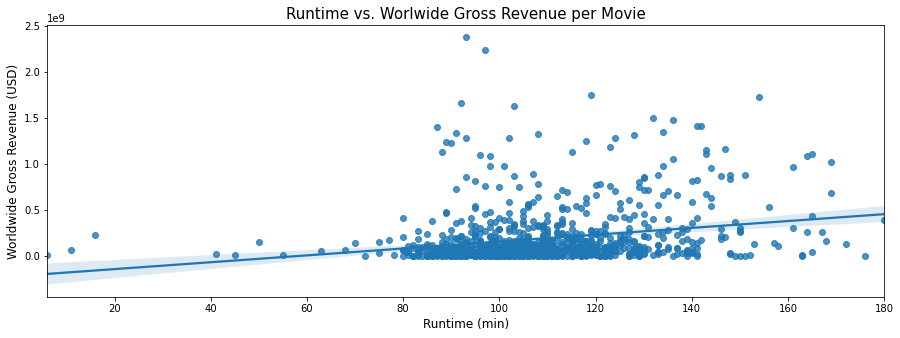

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x=run_gen["runtime_minutes_y"], y=run_gen["worldwide_gross_int"],ax=ax)
ax.set_xlabel("Runtime (min)", size = 12 )
ax.set_ylabel("Worldwide Gross Revenue (USD)", size = 12)
ax.set_title("Runtime vs. Worlwide Gross Revenue per Movie", size = 15)

<BarContainer object of 1133 artists>

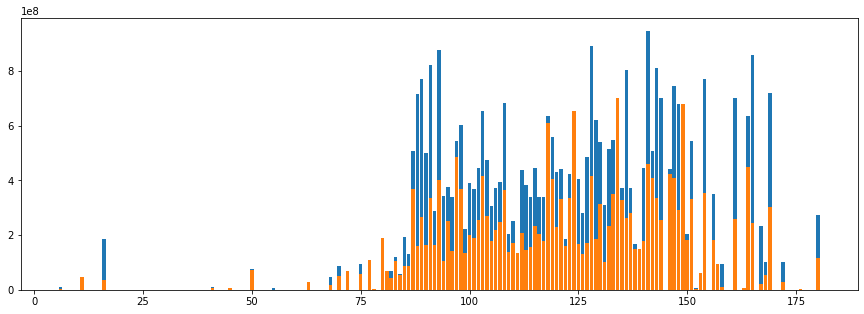

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(mov_clean["runtime_minutes_y"],mov_clean["foreign_gross"])
ax.bar(mov_clean["runtime_minutes_y"],mov_clean["domestic_gross_y"])



In [47]:
mov_clean.corr()

,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y,runtime_minutes_y
Unnamed: 0,1.000000,0.905933,0.324263,0.098387,0.087073,0.034747,0.072586,0.112036,0.955273,0.102123,0.052739,0.893583,0.101675,0.892158,0.106817
id_x,0.905933,1.000000,0.174812,0.104519,-0.040832,0.056729,-0.036522,-0.025278,0.887845,-0.025701,-0.122767,0.815211,0.035057,0.817604,0.041876
popularity,0.324263,0.174812,1.000000,0.315297,0.683044,-0.057543,0.527059,0.538558,0.273307,0.535446,0.552976,0.302555,0.320307,0.296855,0.313209
vote_average,0.098387,0.104519,0.315297,1.000000,0.407612,-0.023262,0.213670,0.200806,0.076802,0.213651,0.082674,0.079586,0.358488,0.085881,0.357573
vote_count,0.087073,-0.040832,0.683044,0.407612,1.000000,-0.037762,0.699973,0.672610,0.063000,0.696669,0.586798,0.099799,0.386533,0.093794,0.378407
id_y,0.034747,0.056729,-0.057543,-0.023262,-0.037762,1.000000,-0.042985,-0.065455,0.039029,-0.058945,-0.085071,0.041695,-0.009247,0.045163,-0.018388
domestic_gross_y,0.072586,-0.036522,0.527059,0.213670,0.699973,-0.042985,1.000000,0.846342,0.096861,0.933088,0.694282,0.116515,0.284556,0.109698,0.278325
foreign_gross,0.112036,-0.025278,0.538558,0.200806,0.672610,-0.065455,0.846342,1.000000,0.122761,0.981274,0.770693,0.135633,0.290248,0.130933,0.287379
year,0.955273,0.887845,0.273307,0.076802,0.063000,0.039029,0.096861,0.122761,1.000000,0.120391,0.049367,0.893421,0.074676,0.894947,0.083779
worldwide_gross_int,0.102123,-0.025701,0.535446,0.213651,0.696669,-0.058945,0.933088,0.981274,0.120391,1.000000,0.760625,0.133678,0.294110,0.128124,0.291262


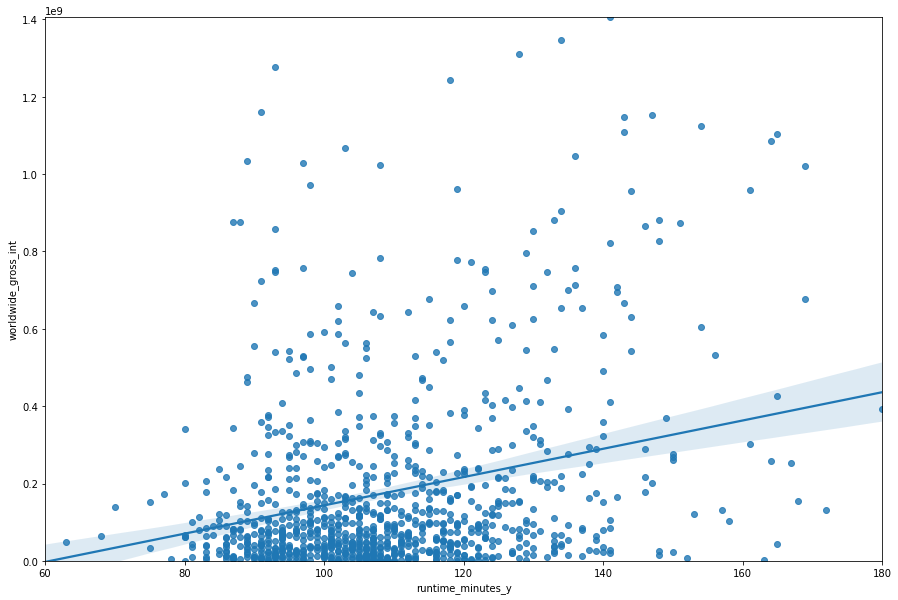

In [48]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x=mov_clean["runtime_minutes_y"], y=mov_clean["worldwide_gross_int"],ax=ax)
ax.set_ylim(0,mov_clean["worldwide_gross_int"].max())
ax.set_xlim(60,mov_clean["runtime_minutes_y"].max());


Text(0.5, 1.0, 'Runtime vs. Worlwide Gross Revenue per Movie')

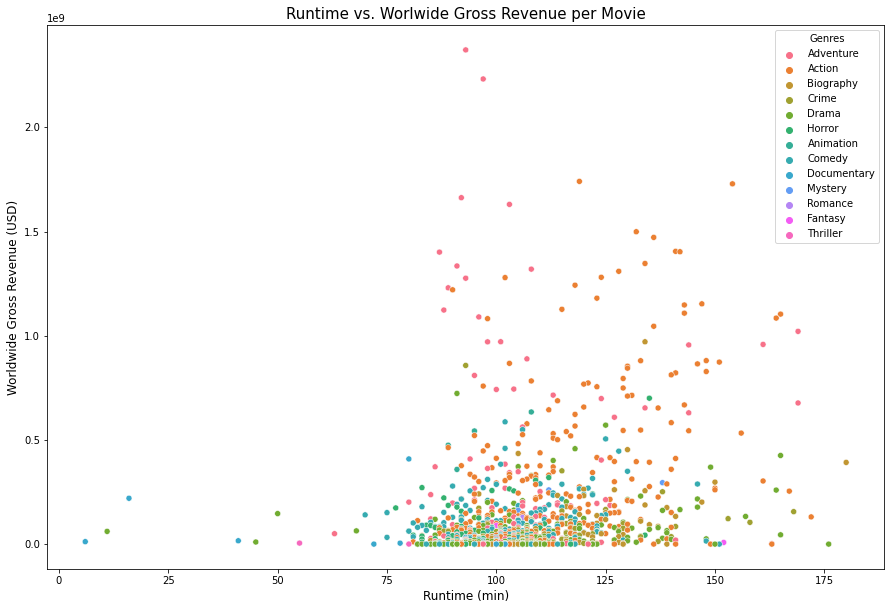

In [49]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=run_gen["runtime_minutes_y"], y=run_gen["worldwide_gross_int"], hue = run_gen["Genres"],ax=ax)
ax.set_xlabel("Runtime (min)", size = 12 )
ax.set_ylabel("Worldwide Gross Revenue (USD)", size = 12)
ax.set_title("Runtime vs. Worlwide Gross Revenue per Movie", size = 15)


<AxesSubplot:xlabel='runtime_minutes_y'>

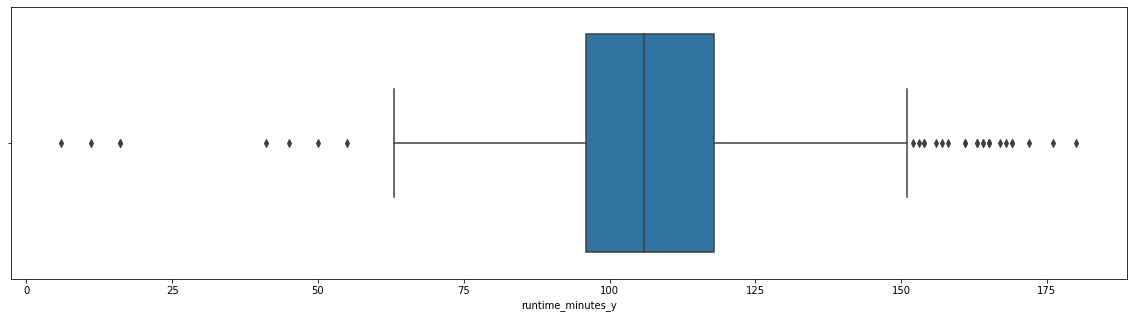

In [50]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.boxplot(x=mov_clean["runtime_minutes_y"],ax=ax)
# for ind, label in enumerate(ax.get_xticklabels()):
#     if ind % 10 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False);

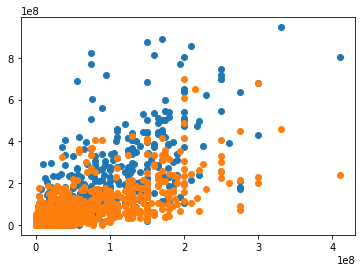

In [51]:
plt.scatter(mov_clean["production_budget_clean"],mov_clean["foreign_gross"])
plt.scatter(mov_clean["production_budget_clean"],mov_clean["domestic_gross_y"])

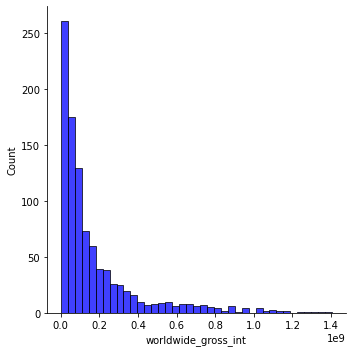

In [52]:
sns.displot(x=mov_clean["worldwide_gross_int"],color="blue");

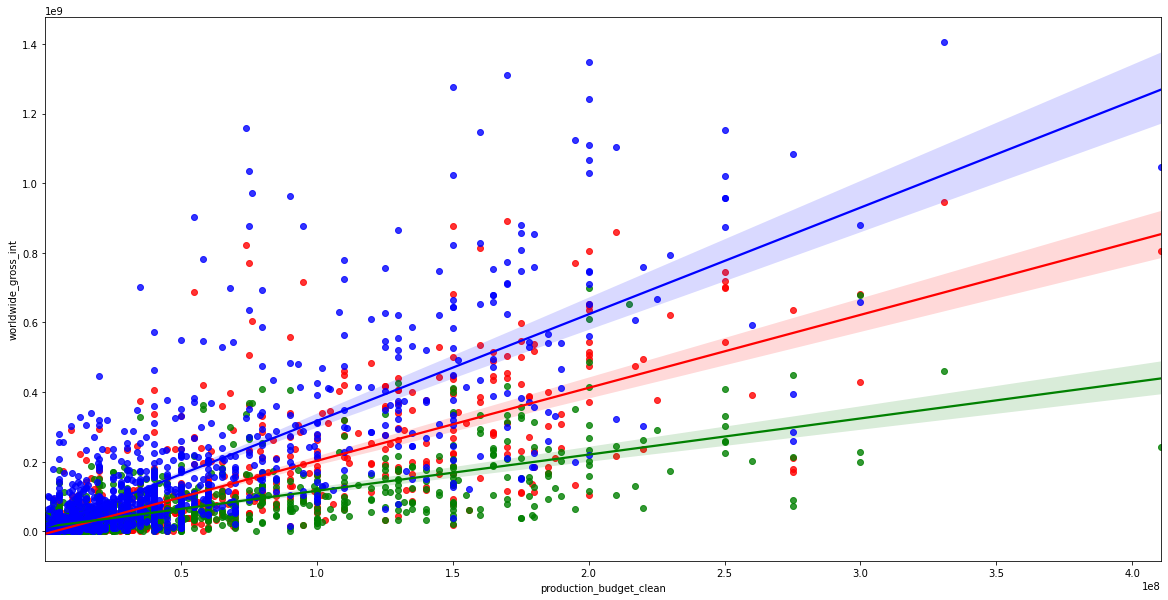

In [53]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.regplot(x=mov_clean["production_budget_clean"],y=mov_clean["foreign_gross"],color="red")
sns.regplot(x=mov_clean["production_budget_clean"],y=mov_clean["domestic_gross_y"],color="green")
sns.regplot(x=mov_clean["production_budget_clean"],y=mov_clean["worldwide_gross_int"],color="blue");


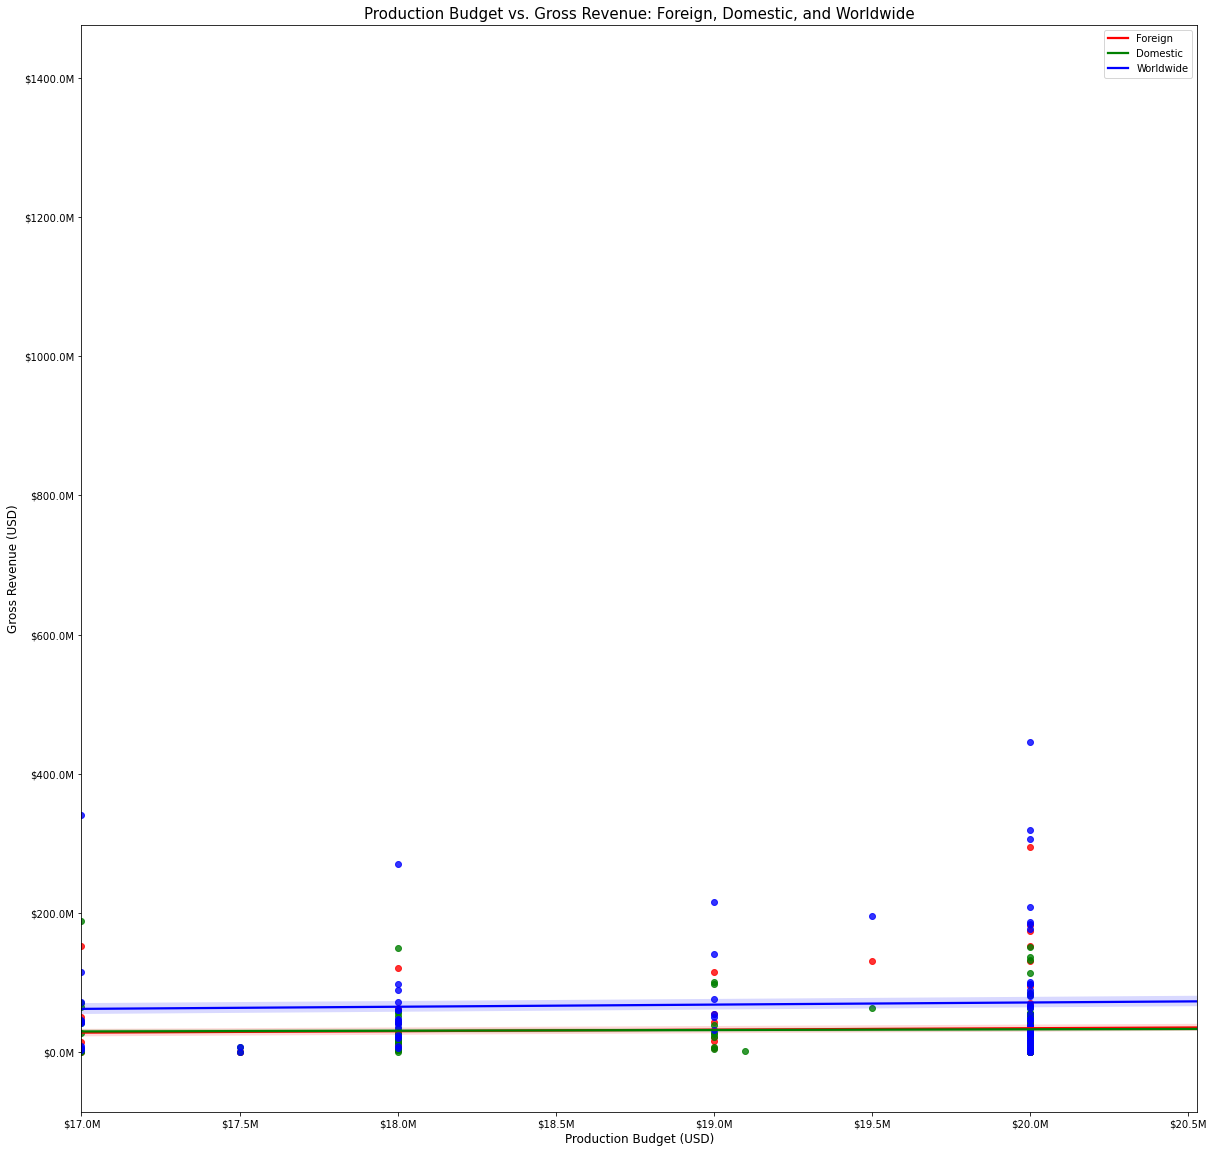

In [54]:
fig, ax = plt.subplots(figsize=(20, 20))

sns.regplot(x=mov_clean["production_budget_clean"],y=mov_clean["foreign_gross"],color="red")
sns.regplot(x=mov_clean["production_budget_clean"],y=mov_clean["domestic_gross_y"],color="green")
sns.regplot(x=mov_clean["production_budget_clean"],y=mov_clean["worldwide_gross_int"],color="blue")
ax.set_xlabel("Production Budget (USD)", size = 12 )
ax.set_ylabel("Gross Revenue (USD)", size = 12)
ax.set_title("Production Budget vs. Gross Revenue: Foreign, Domestic, and Worldwide", size = 15)
ax.set_xlim(17000000,mov_clean["production_budget_clean"].max()*.05)
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fM' % (x * 1e-6))
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
plt.legend(labels=["Foreign","Domestic","Worldwide"]);

In [55]:
grouped.sort_values(by="worldwide_gross_int",ascending=False)

,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y,runtime_minutes_y
genres_y,,,,,,,,,,,,,,,
"Action,Adventure,Sci-Fi",460114,5517479,1013.059,268.4,318238,1951,9.825200e+09,1.479340e+10,82582,2.328750e+10,6941600000,82578,5367.0,82578,5367.0
"Adventure,Animation,Comedy",682524,10273253,860.162,356.7,144127,2539,8.194900e+09,1.500050e+10,114809,2.316890e+10,5890500000,114808,5361.0,114808,5361.0
"Action,Adventure,Fantasy",408675,5514396,648.973,169.3,140475,1470,3.667600e+09,7.863200e+09,56425,1.153080e+10,4195600000,56422,3273.0,56422,3273.0
"Action,Adventure,Comedy",234595,3493874,416.397,102.1,114583,635,2.686100e+09,4.651500e+09,30232,7.337600e+09,1670000000,30230,1738.0,30230,1738.0
"Action,Adventure,Animation",126921,1974097,242.248,92.5,51850,625,2.156091e+09,4.082900e+09,26174,6.238991e+09,1690000000,26171,1300.0,26171,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Drama,Family,Sport",11528,232679,6.080,6.6,185,50,3.010000e+07,0.000000e+00,2014,0.000000e+00,15000000,2014,115.0,2014,115.0
"Drama,Fantasy,Mystery",20718,397837,14.584,7.0,2135,12,1.220000e+07,0.000000e+00,2017,0.000000e+00,5000000,2017,98.0,2017,98.0
Family,21940,408616,1.893,6.7,20,59,1.550000e+05,0.000000e+00,2017,0.000000e+00,500000,2010,0.0,2010,0.0


In [56]:
grouped = grouped.reset_index()

In [57]:
grouped

,genres_y,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y,runtime_minutes_y
0,Action,49080,662790,46.120,24.9,4394,210,1.456000e+08,1.845000e+08,8057,3.301000e+08,206700000,8060,188.0,8060,188.0
1,"Action,Adventure",11177,270938,10.059,5.8,126,54,1.180000e+04,0.000000e+00,2014,0.000000e+00,4500000,2014,103.0,2014,103.0
2,"Action,Adventure,Animation",126921,1974097,242.248,92.5,51850,625,2.156091e+09,4.082900e+09,26174,6.238991e+09,1690000000,26171,1300.0,26171,1300.0
3,"Action,Adventure,Biography",28446,487732,33.740,14.0,13201,28,2.086000e+08,4.182000e+08,4030,6.268000e+08,235000000,4030,278.0,4030,278.0
4,"Action,Adventure,Comedy",234595,3493874,416.397,102.1,114583,635,2.686100e+09,4.651500e+09,30232,7.337600e+09,1670000000,30230,1738.0,30230,1738.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,"Horror,Thriller",137619,2148836,152.676,80.9,23042,719,6.233069e+08,5.308800e+08,30206,1.140273e+09,169250000,30201,1450.0,30199,1367.0
190,"Mystery,Sci-Fi,Thriller",5002,89562,33.843,13.8,10229,184,2.062000e+08,2.157000e+08,4022,4.219000e+08,77000000,4022,217.0,4022,217.0
191,"Mystery,Thriller",19,11324,18.060,8.1,12625,52,1.280000e+08,1.668000e+08,2010,2.948000e+08,80000000,2010,138.0,2010,138.0
192,"Romance,Sci-Fi,Thriller",2532,38050,13.717,6.6,2615,81,6.250000e+07,6.540000e+07,2011,1.279000e+08,50200000,2011,106.0,2011,106.0


In [58]:
grouped["genres_clean"] = grouped["genres_y"].str.split(",",0)
clean_list =[]
for i in grouped["genres_clean"]:
    clean_list.append(i[0])
    
grouped["genres_clean"] = clean_list

grouped

,genres_y,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y,runtime_minutes_y,genres_clean
0,Action,49080,662790,46.120,24.9,4394,210,1.456000e+08,1.845000e+08,8057,3.301000e+08,206700000,8060,188.0,8060,188.0,Action
1,"Action,Adventure",11177,270938,10.059,5.8,126,54,1.180000e+04,0.000000e+00,2014,0.000000e+00,4500000,2014,103.0,2014,103.0,Action
2,"Action,Adventure,Animation",126921,1974097,242.248,92.5,51850,625,2.156091e+09,4.082900e+09,26174,6.238991e+09,1690000000,26171,1300.0,26171,1300.0,Action
3,"Action,Adventure,Biography",28446,487732,33.740,14.0,13201,28,2.086000e+08,4.182000e+08,4030,6.268000e+08,235000000,4030,278.0,4030,278.0,Action
4,"Action,Adventure,Comedy",234595,3493874,416.397,102.1,114583,635,2.686100e+09,4.651500e+09,30232,7.337600e+09,1670000000,30230,1738.0,30230,1738.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,"Horror,Thriller",137619,2148836,152.676,80.9,23042,719,6.233069e+08,5.308800e+08,30206,1.140273e+09,169250000,30201,1450.0,30199,1367.0,Horror
190,"Mystery,Sci-Fi,Thriller",5002,89562,33.843,13.8,10229,184,2.062000e+08,2.157000e+08,4022,4.219000e+08,77000000,4022,217.0,4022,217.0,Mystery
191,"Mystery,Thriller",19,11324,18.060,8.1,12625,52,1.280000e+08,1.668000e+08,2010,2.948000e+08,80000000,2010,138.0,2010,138.0,Mystery
192,"Romance,Sci-Fi,Thriller",2532,38050,13.717,6.6,2615,81,6.250000e+07,6.540000e+07,2011,1.279000e+08,50200000,2011,106.0,2011,106.0,Romance


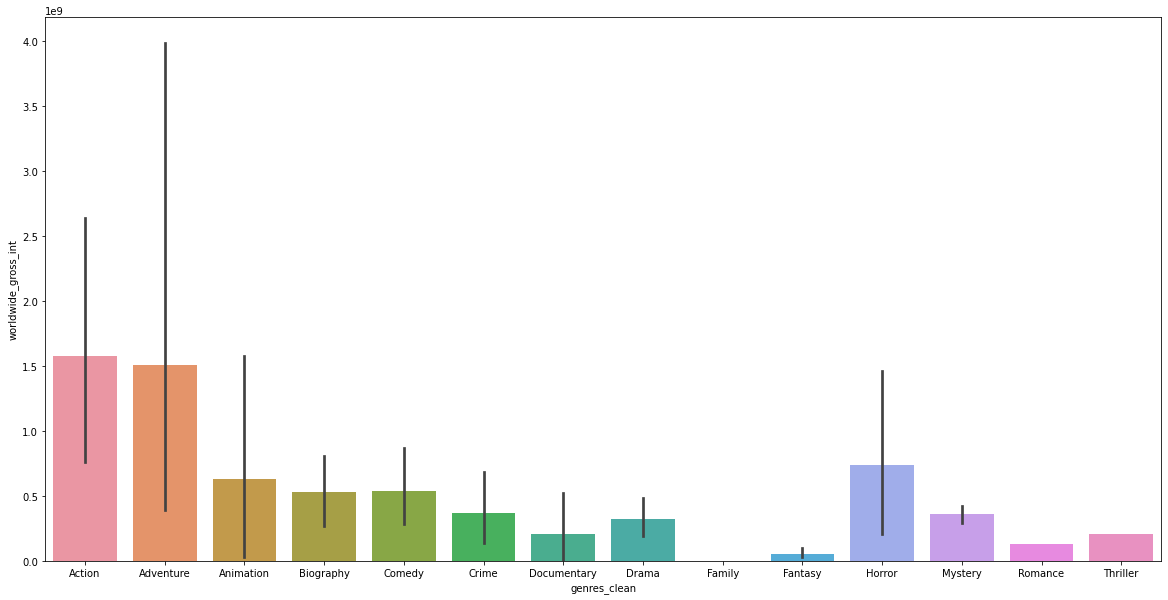

In [59]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x=grouped["genres_clean"],y=grouped["worldwide_gross_int"]);

In [60]:
run_genre = grouped.groupby(["runtime_minutes_y", "genres_clean"]).sum().sort_values(by="worldwide_gross_int",ascending=False)
run_genre.reset_index(inplace=True)

In [61]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [62]:
months = []
for i in budgets["release_date"]:
    temp = []
    first = i.split(" ")
    temp.append(first[0])
    months.append(temp[0])

budgets["release_month"] = months

budgets



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Dec
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Sep


In [63]:
budgets["worldwide_gross"] = budgets["worldwide_gross"].replace({"\$":"",",":""},regex=True)

budgets["worldwide_gross"] = pd.to_numeric(budgets["worldwide_gross"], errors='coerce')

In [64]:
month_by = budgets.groupby("release_month").sum().sort_values(by="worldwide_gross",ascending=False)
month_by.reset_index(inplace=True)

In [65]:
month_by

,release_month,id,worldwide_gross
0,Dec,37837,75761412153
1,Jun,23999,68268531657
2,May,20576,66043077615
3,Nov,24321,65970430672
4,Jul,22046,62023990453
5,Mar,23461,37897684431
6,Aug,26028,30245291880
7,Oct,28645,28343193867
8,Feb,19855,28045454121
9,Apr,23209,27203797390


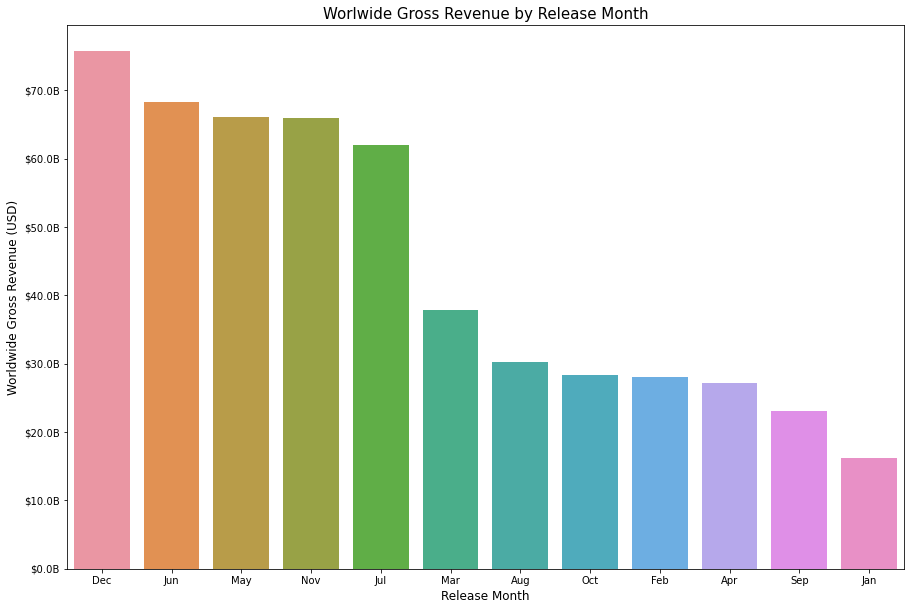

In [66]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=month_by["release_month"],y=month_by["worldwide_gross"],ax=ax)
ax.set_xlabel("Release Month", size = 12 )
ax.set_ylabel("Worldwide Gross Revenue (USD)", size = 12)
ax.set_title("Worlwide Gross Revenue by Release Month", size = 15)
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fB' % (x * 1e-9))
ax.yaxis.set_major_formatter(formatter);

# plt.savefig("Worlwide Gross Revenue by Release Month.jpg",format="jpg")

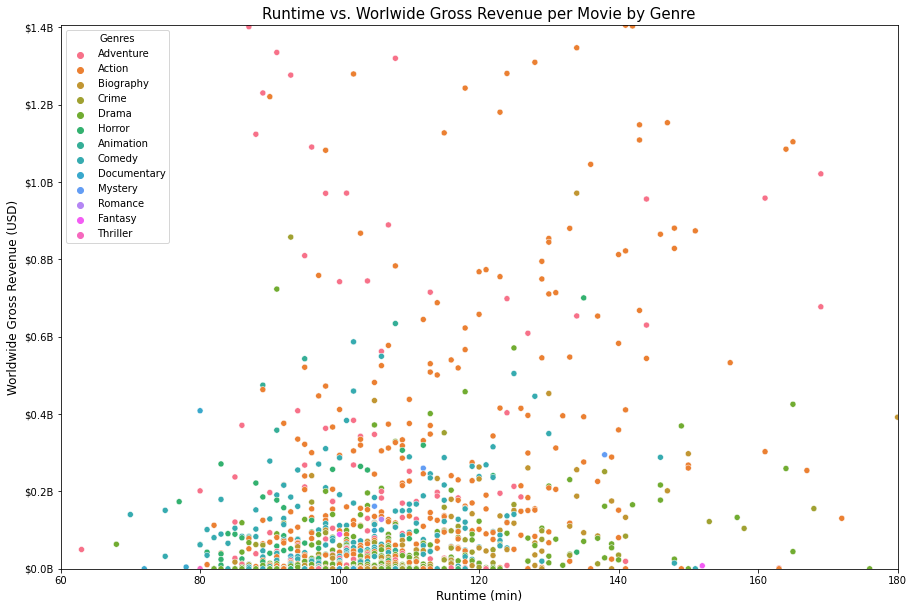

In [67]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=run_gen["runtime_minutes_y"], y=run_gen["worldwide_gross_int"], hue = run_gen["Genres"],ax=ax)
ax.set_xlabel("Runtime (min)", size = 12 )
ax.set_ylabel("Worldwide Gross Revenue (USD)", size = 12)
ax.set_title("Runtime vs. Worlwide Gross Revenue per Movie by Genre", size = 15)
ax.set_ylim(0,mov_clean["worldwide_gross_int"].max())
ax.set_xlim(60,mov_clean["runtime_minutes_y"].max())
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fB' % (x * 1e-9))
ax.yaxis.set_major_formatter(formatter);

# plt.savefig("Runtime vs. Worlwide Gross Revenue per Movie by Genre.jpg",format="jpg")

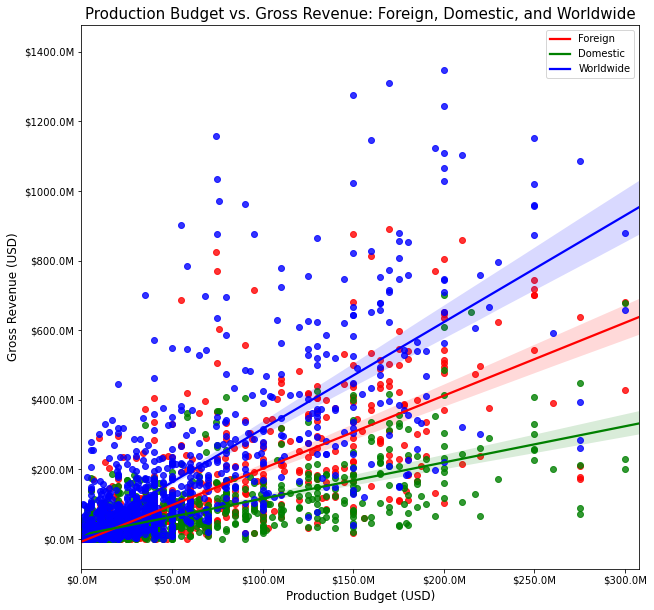

In [68]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.regplot(x=mov_clean["production_budget_clean"],y=mov_clean["foreign_gross"],color="red")
sns.regplot(x=mov_clean["production_budget_clean"],y=mov_clean["domestic_gross_y"],color="green")
sns.regplot(x=mov_clean["production_budget_clean"],y=mov_clean["worldwide_gross_int"],color="blue")
ax.set_xlabel("Production Budget (USD)", size = 12 )
ax.set_ylabel("Gross Revenue (USD)", size = 12)
ax.set_title("Production Budget vs. Gross Revenue: Foreign, Domestic, and Worldwide", size = 15)
ax.set_xlim(0,mov_clean["production_budget_clean"].max()*.75)
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fM' % (x * 1e-6))
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
plt.legend(labels=["Foreign","Domestic","Worldwide"]);

# plt.savefig("Production Budget vs. Gross Revenue: Foreign, Domestic, and Worldwide.jpg",format="jpg")

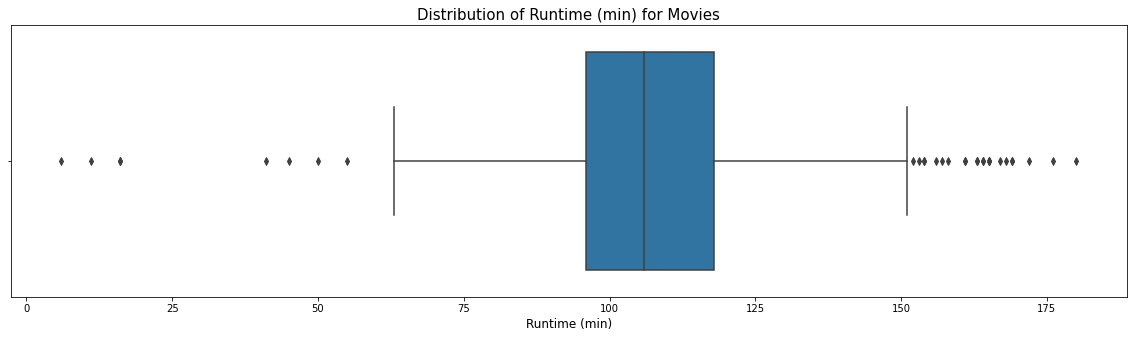

In [69]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.boxplot(x=mov_clean["runtime_minutes_y"],ax=ax)
ax.set_xlabel("Runtime (min)", size = 12 )
ax.set_title("Distribution of Runtime (min) for Movies", size = 15);

# plt.savefig("Distribution of Runtime (min) for Movies.jpg",format="jpg")

In [70]:
sorted_df = grouped.sort_values(by="worldwide_gross_int",ascending=False)
sorted_df

,genres_y,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,domestic_gross_y,foreign_gross,year,worldwide_gross_int,production_budget_clean,start_year_x,runtime_minutes_x,start_year_y,runtime_minutes_y,genres_clean
11,"Action,Adventure,Sci-Fi",460114,5517479,1013.059,268.4,318238,1951,9.825200e+09,1.479340e+10,82582,2.328750e+10,6941600000,82578,5367.0,82578,5367.0,Action
53,"Adventure,Animation,Comedy",682524,10273253,860.162,356.7,144127,2539,8.194900e+09,1.500050e+10,114809,2.316890e+10,5890500000,114808,5361.0,114808,5361.0,Adventure
8,"Action,Adventure,Fantasy",408675,5514396,648.973,169.3,140475,1470,3.667600e+09,7.863200e+09,56425,1.153080e+10,4195600000,56422,3273.0,56422,3273.0,Action
4,"Action,Adventure,Comedy",234595,3493874,416.397,102.1,114583,635,2.686100e+09,4.651500e+09,30232,7.337600e+09,1670000000,30230,1738.0,30230,1738.0,Action
2,"Action,Adventure,Animation",126921,1974097,242.248,92.5,51850,625,2.156091e+09,4.082900e+09,26174,6.238991e+09,1690000000,26171,1300.0,26171,1300.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,"Drama,Family,Sport",11528,232679,6.080,6.6,185,50,3.010000e+07,0.000000e+00,2014,0.000000e+00,15000000,2014,115.0,2014,115.0,Drama
151,"Drama,Fantasy,Mystery",20718,397837,14.584,7.0,2135,12,1.220000e+07,0.000000e+00,2017,0.000000e+00,5000000,2017,98.0,2017,98.0,Drama
179,Family,21940,408616,1.893,6.7,20,59,1.550000e+05,0.000000e+00,2017,0.000000e+00,500000,2010,0.0,2010,0.0,Family
28,"Action,Crime,Horror",2758,48572,7.816,6.1,472,22,1.100000e+06,0.000000e+00,2011,0.000000e+00,4000000,2011,88.0,2011,88.0,Action


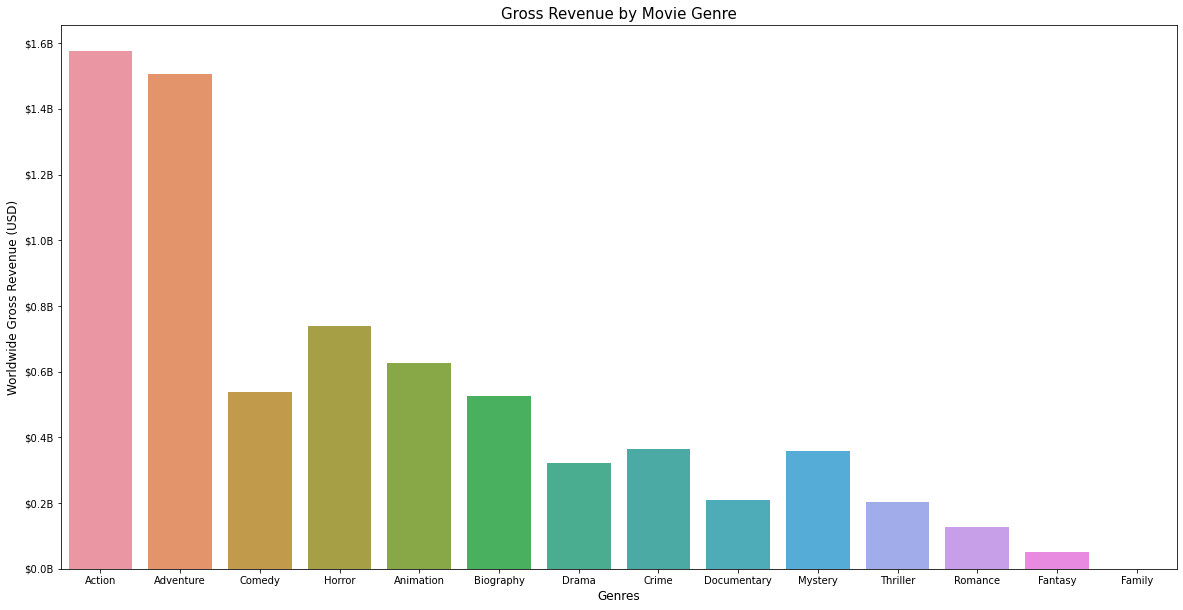

In [71]:

fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x=sorted_df["genres_clean"],y=sorted_df["worldwide_gross_int"], ci=None)
ax.set_xlabel("Genres", size = 12 )
ax.set_ylabel("Worldwide Gross Revenue (USD)", size = 12)
ax.set_title("Gross Revenue by Movie Genre", size = 15)
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fB' % (x * 1e-9))
ax.yaxis.set_major_formatter(formatter);

# plt.savefig("Gross Revenue by Movie Genre.jpg",format="jpg")

In [72]:

hues = run_gen["Genres"].values.tolist()
len(run_gen["Genres"].unique())

13

In [73]:
colors = ['blue','red','#bcbcbc', '#bcbcbc', '#bcbcbc', '#bcbcbc', '#bcbcbc', '#bcbcbc', '#bcbcbc', '#bcbcbc', '#bcbcbc', '#bcbcbc', '#bcbcbc']




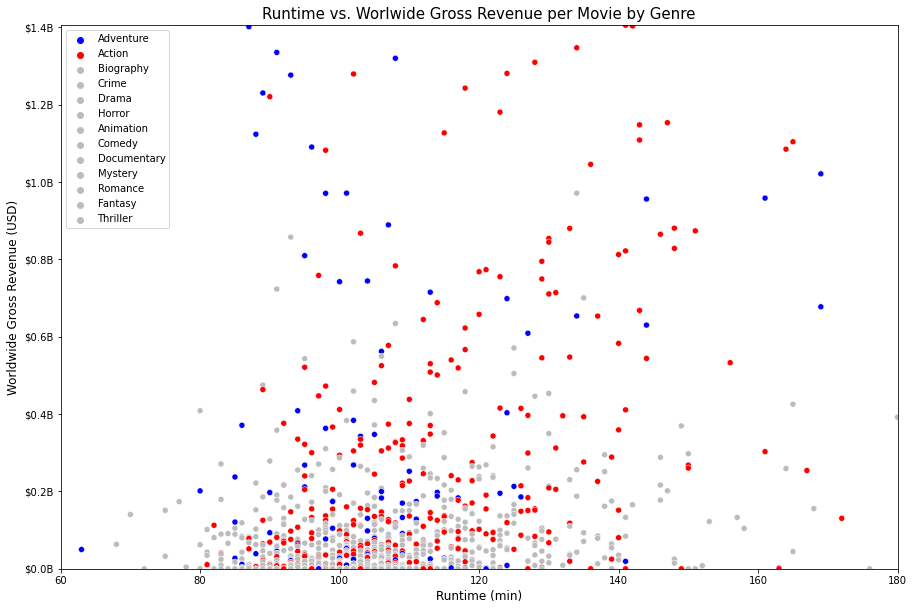

In [74]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x=run_gen["runtime_minutes_y"], y=run_gen["worldwide_gross_int"], hue=hues, palette=colors, ax=ax)
ax.set_xlabel("Runtime (min)", size = 12 )
ax.set_ylabel("Worldwide Gross Revenue (USD)", size = 12)
ax.set_title("Runtime vs. Worlwide Gross Revenue per Movie by Genre", size = 15)
ax.set_ylim(0,mov_clean["worldwide_gross_int"].max())
ax.set_xlim(60,mov_clean["runtime_minutes_y"].max())
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fB' % (x * 1e-9))
ax.yaxis.set_major_formatter(formatter);

# plt.savefig("Runtime vs. Worlwide Gross Revenue per Movie by Genre_v2.jpg",format="jpg")